In [18]:
# Description:  Calculate some simple stats using Python
#               - Mean (sample and population)
#               - Calculate the Adjusted Mean 
#               - Standard Deviation
#               - Variance
#               - CoVariance Matrix
#
# Author: Dr. Steven C. Lindo
# Date: 1/27/2022
#
# -    -    -    -    -    -    -    -    -    -    -    -    -    
# Revision History
# Name      Date        Description
# scl      1/27/2022    Intial Code added function for sample
#                       and population mean calculations.
#
# -    -    -    -    -    -    -    -    -    -    -    -    -    


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [20]:
# Functions are in this section of the Code
# Table of Contents
#   o  f_calcMean:
#   o  f_calcAdjMean:
#   o  f_computeBeta
#   o  predictY
#
# -    -    -    -    -    -    -    -    -    -    -    -    -    
# f_calcMean takes in two parameters, p1 is a list and 
# p2 is a string 'sam' = sample mean, 'pop' = population mean
# the function return either the sample or population mean 
# if there is a problem with p2, it will return -99999.
# -    -    -    -    -    -    -    -    -    -    -    -    -    
def f_calcMean(p1, p2):
  # init the results
  result = -99999
  if p2 == 'pop':
    result = p1.sum() / len(p1)
  elif p2 == 'sam':
    result = p1.sum() / (len(p1) - 1)
  return result

# -    -    -    -    -    -    -    -    -    -    -    -    -    
# f_calcAdjMean takes in two parameters, p1 is a list and
# p2 is a string 'sam' = sample mean, 'pop' = population mean
# this function will call f_calcMean and use that to subtract
# the mean from both x and y values in the p1
# -    -    -    -    -    -    -    -    -    -    -    -    -    
def f_calcAdjMean(p1, p2):
  # init the results
  result = -99999
  m = f_calcMean(p1,p2)
  result = (p1 - m)
  result = result.rename(str.upper, axis='columns')
  return result, m

# -    -    -    -    -    -    -    -    -    -    -    -    -    
# f_computeBeta adjusted mean from both x and y and compute
# beta cofficients for the regression line.  Where the formula
# is written as: y = b0 + b1*x, 
#   where, b0=y-intercept, b1=slope, 
# -    -    -    -    -    -    -    -    -    -    -    -    -    
def f_computeBeta(adjusted_x, adjusted_y, mean_x, mean_y):
  b1 = sum((adjusted_x)*(adjusted_y)) / sum((adjusted_x)**2)
  b0 = mean_y - b1*mean_x
  print('b0 = ', b0)
  print('b1 = ', b1)
  return b0, b1

# -    -    -    -    -    -    -    -    -    -    -    -    -    
# f_calcAdjMean takes in two parameters, p1 is a list and
# Given that the formula is written as: y = b0 + b1*x, 
# approximate y (or predict) the values of y 
# the mean from both x and y values in the p1
# -    -    -    -    -    -    -    -    -    -    -    -    -    
def predictY(b0, b1, x):
  predict_y = []
  for num in x:
    predict_y.append(b0 + (b1*num))
  return predict_y

In [21]:
# -    -    -    -    -    -    -    -    -    -    -    -    -    
# main() is a special function that allows us to instrument the 
# other functions to produce the desired results.
def main(r,c,num):

  data = np.random.randint(range,size=(r, c))
  data = pd.DataFrame(data, columns=['x','y'])

  res, mean  = f_calcAdjMean(data,'pop')
  res  = pd.concat([data, res],axis=1)

  beta0, beta1 = f_computeBeta(res['X'], res['Y'], mean[0], mean[1])
  y_pred = predictY(beta0, beta1, data['x'])

  status = 'success' # later make a try catch for this variable
  return data, res, y_pred, status

In [22]:
# Global Variables
rows = 10
cols = 2
range = 10

# Call main() here.  This should be the last line in your code.
d,r,p,s = main(rows, cols, range)
print('\n',r)


b0 =  6.961988304093567
b1 =  -0.38304093567251457

    x  y    X    Y
0  1  7 -3.6  1.8
1  7  3  2.4 -2.2
2  3  8 -1.6  2.8
3  2  5 -2.6 -0.2
4  5  1  0.4 -4.2
5  7  6  2.4  0.8
6  9  7  4.4  1.8
7  5  4  0.4 -1.2
8  1  9 -3.6  3.8
9  6  2  1.4 -3.2


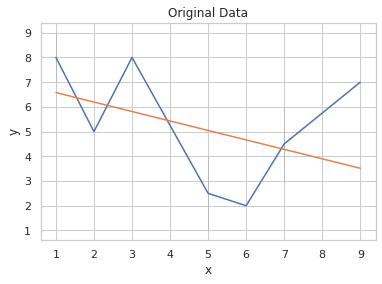

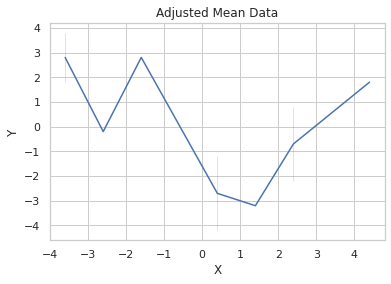

In [23]:
sns.set(style='whitegrid',context='notebook')
sns.lineplot(data=r, x='x', y='y')
sns.lineplot(data=r, x='x', y=p)
plt.title('Original Data')
plt.show()

sns.lineplot(data=r, x='X', y='Y')
plt.title('Adjusted Mean Data')
plt.show()
